In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
np.random.seed(7)

Using TensorFlow backend.
/home/kierannp/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kierannp/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kierannp/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kierannp/.local/lib/python3.6/site-packages/tensorflo

There are 62 days on record
There are 62 days on record


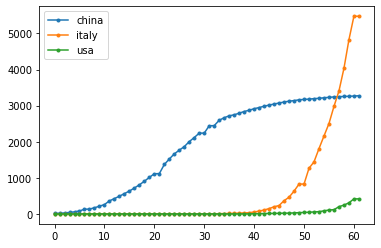

In [4]:
df = pd.read_csv('/home/kierannp/CSE885Final/Data/archived_time_series/time_series_19-covid-Deaths_archived_0325.csv')
countries=df[df.columns[1]]
columns=df.columns

def get_country_total(country):
    all_pop = []
    for col in country.columns[4:]:
        all_pop.append(country[col].sum())
    return all_pop

china = df[countries=='China']
usa = df[df[columns[1]]==np.unique(df[columns[1]])[172]]
hubei=china[china[china.columns[0]]=='Hubei']
italy = df[countries=='Italy']
china = df[countries=='China']

print("There are {} days on record".format(len(china.columns)-4))
print("There are {} days on record".format(len(italy.columns)-4))

hubei_pop = np.array(np.array(hubei)[0,4:],dtype=float)
italy_pop = np.array(italy)[0,4:].astype(np.float64)
usa_pop = np.array(usa)
plt.plot(np.arange(0,62,1),get_country_total(china),'.-',label='china')
plt.plot(np.arange(0,62,1),get_country_total(italy),'.-',label='italy')
plt.plot(np.arange(0,62,1),get_country_total(usa),'.-',label='usa')
# plt.yscale('log')
# plt.xscale('log')
plt.legend()

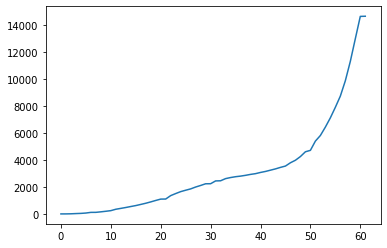

In [7]:
world = get_country_total(df)
plt.plot(range(len(world)),world)

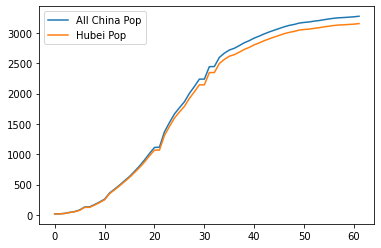

In [8]:
# np.unique(usa[columns[0]])

all_china=get_country_total(china)
plt.plot(range(len(all_china)),all_china,label='All China Pop')
plt.plot(range(len(hubei_pop)),hubei_pop,label='Hubei Pop')
plt.legend()

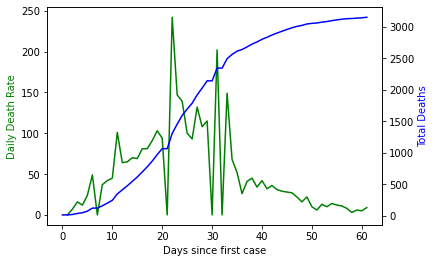

In [9]:
i0=hubei_pop[0]
diff=[]
for i in hubei_pop[1:]:
    diff.append(i-i0)
    i0=i
    
days=np.arange(0,len(hubei_pop),1)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(np.arange(1,len(diff)+1,1), diff, 'g-')
ax2.plot(days, hubei_pop, 'b-')

ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Daily Death Rate', color='g')
ax2.set_ylabel('Total Deaths', color='b')

plt.show()

In [24]:
hubei = hubei_pop.reshape((62,1))
data = pd.DataFrame( { 'hubei deaths':hubei.reshape((62,)) } )
dataset = data.values
dataset = dataset.astype('int32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

49 13
Epoch 1/50
 - 1s - loss: 0.2823
Epoch 2/50
 - 0s - loss: 0.2241
Epoch 3/50
 - 0s - loss: 0.1741
Epoch 4/50
 - 0s - loss: 0.1326
Epoch 5/50
 - 0s - loss: 0.1013
Epoch 6/50
 - 0s - loss: 0.0800
Epoch 7/50
 - 0s - loss: 0.0643
Epoch 8/50
 - 0s - loss: 0.0549
Epoch 9/50
 - 0s - loss: 0.0490
Epoch 10/50
 - 0s - loss: 0.0443
Epoch 11/50
 - 0s - loss: 0.0404
Epoch 12/50
 - 0s - loss: 0.0368
Epoch 13/50
 - 0s - loss: 0.0329
Epoch 14/50
 - 0s - loss: 0.0292
Epoch 15/50
 - 0s - loss: 0.0255
Epoch 16/50
 - 0s - loss: 0.0217
Epoch 17/50
 - 0s - loss: 0.0183
Epoch 18/50
 - 0s - loss: 0.0148
Epoch 19/50
 - 0s - loss: 0.0116
Epoch 20/50
 - 0s - loss: 0.0088
Epoch 21/50
 - 0s - loss: 0.0066
Epoch 22/50
 - 0s - loss: 0.0047
Epoch 23/50
 - 0s - loss: 0.0033
Epoch 24/50
 - 0s - loss: 0.0023
Epoch 25/50
 - 0s - loss: 0.0016
Epoch 26/50
 - 0s - loss: 0.0012
Epoch 27/50
 - 0s - loss: 9.2974e-04
Epoch 28/50
 - 0s - loss: 7.8530e-04
Epoch 29/50
 - 0s - loss: 7.0141e-04
Epoch 30/50
 - 0s - loss: 6.6230e-

In [25]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 67.83 RMSE
Test Score: 43.58 RMSE


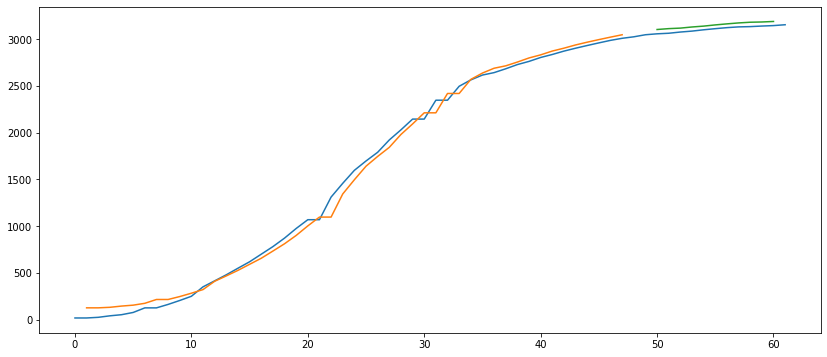

In [26]:
plt.figure(figsize=(14,6))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [16]:
df2 = pd.read_csv('/home/kierannp/CSE885Final/Data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv')
df2

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [17]:
usa_cases = df2[df2[columns[1]]=='US']
china_cases = df2[df2[columns[1]]=='China']
italy_cases = df2[df2[columns[1]]=='Italy']

In [18]:
usa_pop=get_country_total(usa)
arr=np.array(usa_pop)
usa_arr=arr[arr!=0]

In [151]:
data = pd.DataFrame( { ' ':usa_arr.reshape((len(usa_arr),)) } )
dataset = data.values
dataset = dataset.astype('int32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(512))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

19 5
Epoch 1/50
 - 0s - loss: 0.0074
Epoch 2/50
 - 0s - loss: 0.0041
Epoch 3/50
 - 0s - loss: 0.0054
Epoch 4/50
 - 0s - loss: 0.0044
Epoch 5/50
 - 0s - loss: 0.0034
Epoch 6/50
 - 0s - loss: 0.0030
Epoch 7/50
 - 0s - loss: 0.0027
Epoch 8/50
 - 0s - loss: 0.0021
Epoch 9/50
 - 0s - loss: 0.0017
Epoch 10/50
 - 0s - loss: 0.0016
Epoch 11/50
 - 0s - loss: 7.1089e-04
Epoch 12/50
 - 0s - loss: 7.5792e-04
Epoch 13/50
 - 0s - loss: 6.3782e-04
Epoch 14/50
 - 0s - loss: 1.5378e-04
Epoch 15/50
 - 0s - loss: 1.4335e-04
Epoch 16/50
 - 0s - loss: 9.8439e-05
Epoch 17/50
 - 0s - loss: 2.5270e-04
Epoch 18/50
 - 0s - loss: 1.0850e-04
Epoch 19/50
 - 0s - loss: 1.1903e-04
Epoch 20/50
 - 0s - loss: 1.8211e-04
Epoch 21/50
 - 0s - loss: 7.2945e-05
Epoch 22/50
 - 0s - loss: 6.4460e-05
Epoch 23/50
 - 0s - loss: 1.0816e-04
Epoch 24/50
 - 0s - loss: 8.5796e-05
Epoch 25/50
 - 0s - loss: 7.4331e-05
Epoch 26/50
 - 0s - loss: 1.0316e-04
Epoch 27/50
 - 0s - loss: 8.1826e-05
Epoch 28/50
 - 0s - loss: 8.8815e-05
Epoch 29

In [152]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.06 RMSE
Test Score: 17.12 RMSE


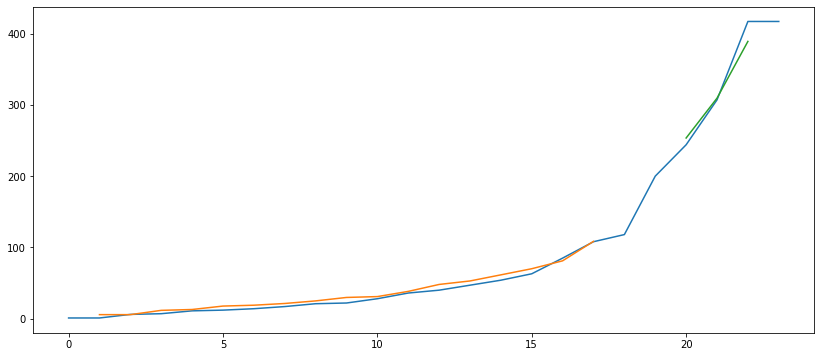

In [153]:
plt.figure(figsize=(14,6))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [154]:
china_val=get_country_total(china_cases)
X=list(np.arange(0,len(china_val),1))

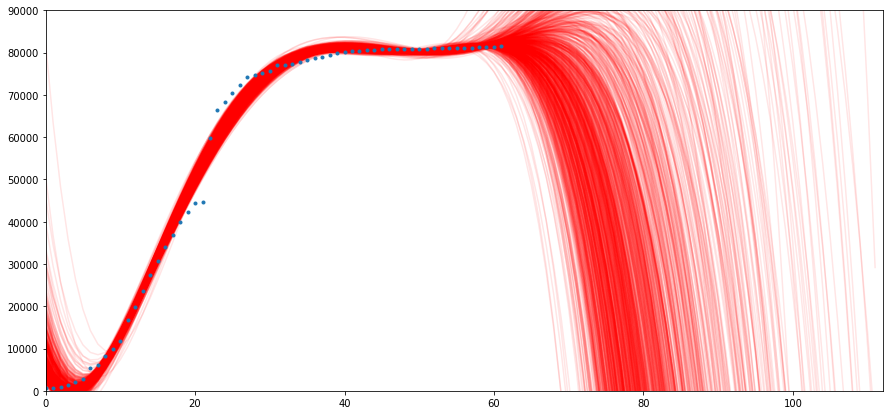

In [32]:
plt.figure(figsize=(15,7))
plt.xlim(0,len(X)+50)
plt.ylim(0,90000)
size=11
addon=list(range(len(X),len(X)+50,1))
for i in range(1000): 
    hold2=[]
    sample=np.sort(np.random.choice(len(X),len(X)-size))
    for ranval in sample:
        hold2.append(china_val[ranval])
    mymodel = np.poly1d(np.polyfit(sample, hold2, 5))
    plt.plot(X+addon,mymodel(X+addon),'r',alpha=.1)
    
plt.plot(X,china_val,'.')

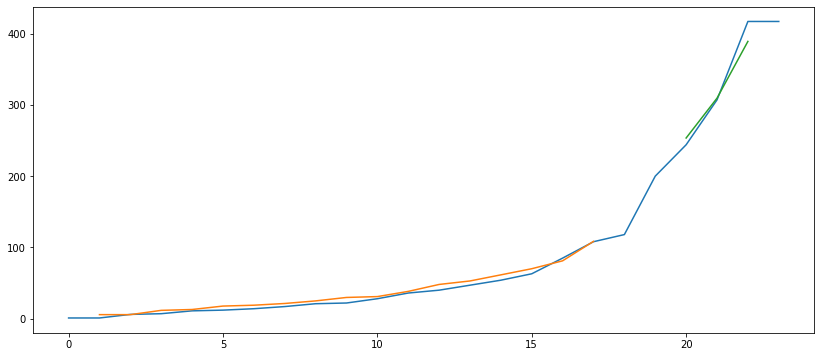

In [155]:
plt.figure(figsize=(14,6))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

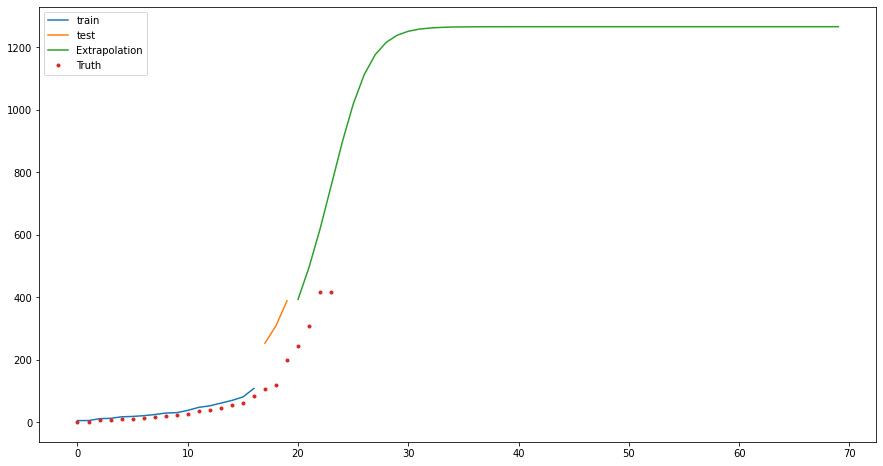

In [161]:
plt.figure(figsize=(15,8))
xlength=len(trainX)+len(testX)
plt.plot(np.arange(0,len(trainX),1),scaler.inverse_transform(model.predict(trainX.reshape(len(trainX),1,1))),label='train')
plt.plot(np.arange(len(trainX),xlength,1),scaler.inverse_transform(model.predict(testX.reshape(len(testX),1,1))),label='test')
plt.plot(np.arange(xlength, xlength+days_ahead, 1),scaler.inverse_transform(extraper(50)),label='Extrapolation')
plt.plot(np.arange(0,len(data.values),1),data.values,'.',label='Truth')
plt.legend()

In [33]:
data = pd.DataFrame( { 'hubei deaths':hubei.reshape((62,)) } )
dataset = data.values
dataset = dataset.astype('int32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
print('train_size:{},dataset:{}'.format(train_size,len(dataset)))
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back = 1
extrap=np.arange(,30,1)
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

train_size:49,dataset:62


In [158]:
def extraper(days_ahead):
    extrap=np.zeros((days_ahead,1))
    extrap[0][0]+=model.predict(testX[-1].reshape(1,1,1))
    for i in range(days_ahead):
        extrap[i][0]+=model.predict(extrap[i-1][0].reshape(1,1,1))
    return extrap

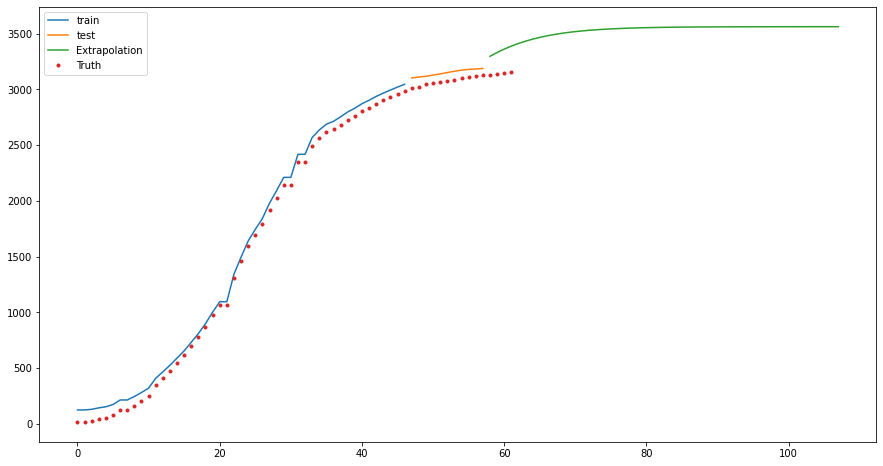

In [148]:
plt.figure(figsize=(15,8))
xlength=len(trainX)+len(testX)
plt.plot(np.arange(0,len(trainX),1),scaler.inverse_transform(model.predict(trainX.reshape(47,1,1))),label='train')
plt.plot(np.arange(len(trainX),xlength,1),scaler.inverse_transform(model.predict(testX.reshape(11,1,1))),label='test')
plt.plot(np.arange(xlength, xlength+days_ahead, 1),scaler.inverse_transform(extrap),label='Extrapolation')
plt.plot(np.arange(0,len(data.values),1),data.values,'.',label='Truth')
plt.legend()